In [1]:
#Dataset- Source https://www.kaggle.com/datasets/sudalairajkumar/cryptocurrency-historical-prices-coingecko?resource=download&select=bitcoin.csv

In [2]:
# # BTC - Dataset preprocessing

In [3]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #Normalization

In [4]:
BTC = pd.read_csv('bitcoin.csv')

In [5]:
BTC.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,313.992,4.699936e+07,4.293958e+09,bitcoin
1,2015-01-02 00:00:00.000,314.446,3.885591e+07,4.301448e+09,bitcoin
2,2015-01-03 00:00:00.000,286.572,1.187789e+08,3.921358e+09,bitcoin
3,2015-01-04 00:00:00.000,260.936,2.055001e+08,3.571640e+09,bitcoin
4,2015-01-05 00:00:00.000,273.220,1.550381e+08,3.740880e+09,bitcoin


In [6]:
BTC.drop(['coin_name'], axis=1, inplace=True)
BTC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2999 non-null   object 
 1   price         2999 non-null   float64
 2   total_volume  2999 non-null   float64
 3   market_cap    2998 non-null   float64
dtypes: float64(3), object(1)
memory usage: 93.8+ KB


In [7]:
#As market_cap has 1 NaN value
# Filling it By Interpolation
BTC.market_cap.interpolate(method='linear', inplace=True)

In [8]:
# Adding DateReference Column for Training with Linear Regression
# And Frommtting Date
BTC['date'] = pd.to_datetime(BTC['date'])

# Computing the number of days since the earliest date in the column
ref_date = BTC['date'].min()
BTC['DaysSinceRef'] = (BTC['date'] - ref_date).dt.days

In [9]:
BTC.price = BTC.price.round().astype('Int64')
BTC.total_volume = BTC.total_volume.round().astype('Int64')
BTC.market_cap = BTC.market_cap.round().astype('Int64')

In [10]:
BTC.head(5)

,date,price,total_volume,market_cap,DaysSinceRef
0,2015-01-01,314,46999364,4293958347,0
1,2015-01-02,314,38855906,4301448335,1
2,2015-01-03,287,118778941,3921358112,2
3,2015-01-04,261,205500149,3571639781,3
4,2015-01-05,273,155038125,3740880426,4


In [11]:
#Snapshot for PCA
cols=['price','total_volume','market_cap']
X =  np.array(BTC[cols].values).astype(np.float64)

In [12]:
# Since Data Viries alot in sclae -> Normalizing
cols=['price','total_volume','market_cap']
scaler = MinMaxScaler()
BTC[cols] = scaler.fit_transform(BTC[cols])

In [13]:
#Check Normalized Form
BTC.head(5)

,date,price,total_volume,market_cap,DaysSinceRef
0,2015-01-01,0.002105,0.000161,0.001513,0
1,2015-01-02,0.002105,0.000115,0.001519,1
2,2015-01-03,0.001705,0.000562,0.001221,2
3,2015-01-04,0.001320,0.001047,0.000947,3
4,2015-01-05,0.001498,0.000765,0.001080,4


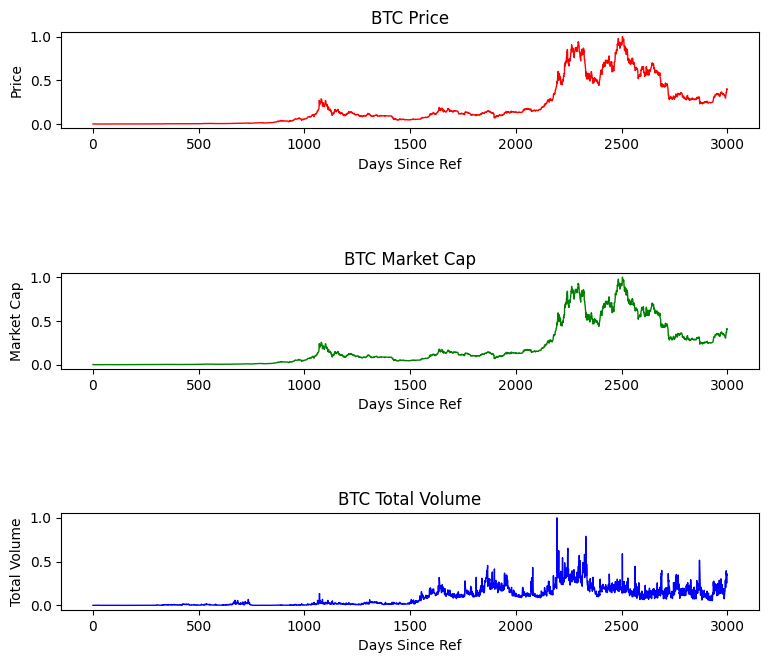

In [14]:
#Univariate Analysis:
fig = plt.figure(figsize=(9,7.5))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
ax1.plot(BTC.price.values, 'r', linewidth=1)# x='DaysSinceRef',y='market_cap')
ax2.plot(BTC.market_cap.values, 'g', linewidth=1)#x=DaysSinceRef',y='price')
ax3.plot(BTC.total_volume.values, 'b', linewidth=1)# plot(x='DaysSinceRef',y='total_volume')

# add axis labels and a title to each subplot
ax1.set_xlabel('Days Since Ref')
ax1.set_ylabel('Price')
ax1.set_title('BTC Price')

ax2.set_xlabel('Days Since Ref')
ax2.set_ylabel('Market Cap')
ax2.set_title('BTC Market Cap')

ax3.set_xlabel('Days Since Ref')
ax3.set_ylabel('Total Volume')
ax3.set_title('BTC Total Volume')

fig.subplots_adjust(hspace=1.5)
# display the plot
plt.show()


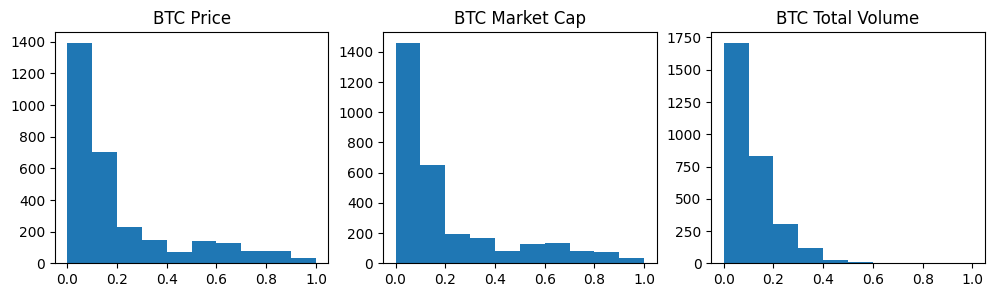

In [15]:
fig = plt.figure(figsize=(12,3))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.hist(BTC.price.values)
ax2.hist(BTC.market_cap.values)
ax3.hist(BTC.total_volume.values)

ax1.set_title('BTC Price')

ax2.set_title('BTC Market Cap')

ax3.set_title('BTC Total Volume')

fig.subplots_adjust(hspace=1.5)
# display the plot
plt.show()


<Axes: xlabel='price', ylabel='total_volume'>

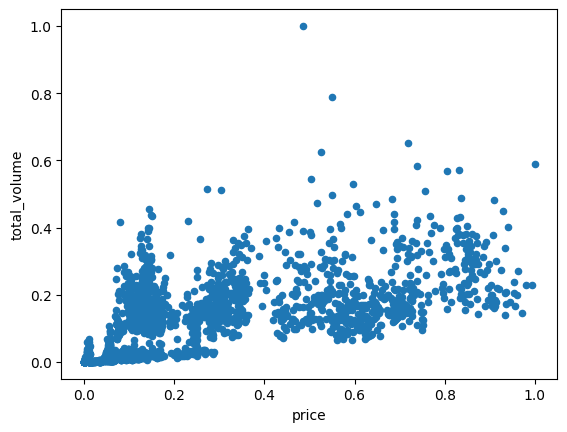

In [16]:
#Bivariate Analysis:
BTC.plot.scatter(x='price', y = 'total_volume')

<Axes: xlabel='price', ylabel='market_cap'>

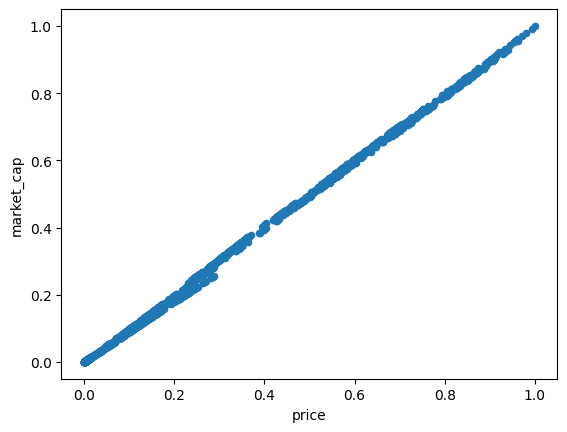

In [17]:
BTC.plot.scatter(x='price', y = 'market_cap')

In [18]:
#Multi-Variate Analysis
BTC.cov()

C:\Users\mubee\AppData\Local\Temp\ipykernel_17084\1187185209.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  BTC.cov()


,price,total_volume,market_cap,DaysSinceRef
price,0.057484,0.018166,0.057481,153.713264
total_volume,0.018166,0.011635,0.018182,68.008182
market_cap,0.057481,0.018182,0.057508,154.496474
DaysSinceRef,153.713264,68.008182,154.496474,749776.774769


array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='total_volume', ylabel='price'>,
        <Axes: xlabel='market_cap', ylabel='price'>,
        <Axes: xlabel='DaysSinceRef', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='total_volume'>,
        <Axes: xlabel='total_volume', ylabel='total_volume'>,
        <Axes: xlabel='market_cap', ylabel='total_volume'>,
        <Axes: xlabel='DaysSinceRef', ylabel='total_volume'>],
       [<Axes: xlabel='price', ylabel='market_cap'>,
        <Axes: xlabel='total_volume', ylabel='market_cap'>,
        <Axes: xlabel='market_cap', ylabel='market_cap'>,
        <Axes: xlabel='DaysSinceRef', ylabel='market_cap'>],
       [<Axes: xlabel='price', ylabel='DaysSinceRef'>,
        <Axes: xlabel='total_volume', ylabel='DaysSinceRef'>,
        <Axes: xlabel='market_cap', ylabel='DaysSinceRef'>,
        <Axes: xlabel='DaysSinceRef', ylabel='DaysSinceRef'>]],
      dtype=object)

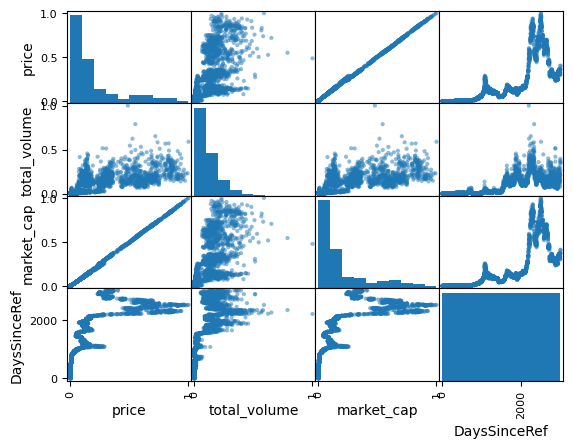

In [19]:
pd.plotting.scatter_matrix(BTC)

In [20]:
#PCA
X

array([[3.14000000e+02, 4.69993640e+07, 4.29395835e+09],
       [3.14000000e+02, 3.88559060e+07, 4.30144834e+09],
       [2.87000000e+02, 1.18778941e+08, 3.92135811e+09],
       ...,
       [2.51610000e+04, 6.06880569e+10, 4.86375598e+11],
       [2.74670000e+04, 6.46176156e+10, 5.30038219e+11],
       [2.71080000e+04, 4.64736511e+10, 5.23262281e+11]])

In [21]:
# Computing the covariance matrix
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(np.array(X_centered).T)
cov_matrix


array([[2.61483447e+08, 2.19165450e+14, 4.94846228e+15],
       [2.19165450e+14, 3.72273004e+20, 4.15126472e+21],
       [4.94846228e+15, 4.15126472e+21, 9.36964548e+22]])

In [22]:
#Computing the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues,'\n',eigenvectors)

[-1.67772160e+07  9.38807483e+22  1.87979562e+20] 
 [[ 1.00000000e+00 -5.27617572e-08  2.75929514e-09]
 [ 4.16551491e-10 -4.43508456e-02 -9.99016017e-01]
 [-5.28322176e-08 -9.99016017e-01  4.43508456e-02]]


In [23]:
#Sorting the eigenvectors by decreasing eigenvalues
eigenvectors_sorted = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
print(eigenvectors_sorted)

[[-5.27617572e-08  2.75929514e-09  1.00000000e+00]
 [-4.43508456e-02 -9.99016017e-01  4.16551491e-10]
 [-9.99016017e-01  4.43508456e-02 -5.28322176e-08]]


In [24]:
# Top 2 vectors as enough as 3rd one has negligible participation
top_2_eigenvectors = eigenvectors_sorted[:, :2]

In [25]:
#Transforming Data
X_pca = (np.dot(top_2_eigenvectors.T, X_centered.T)).transpose()

In [26]:
df = pd.DataFrame(X_pca,columns=["PC1","PC2"])
df

,PC1,PC2
0,2.474638e+11,5.963265e+09
1,2.474567e+11,5.971733e+09
2,2.478329e+11,5.875031e+09
3,2.481784e+11,5.772885e+09
4,2.480116e+11,5.830803e+09
...,...,...
2994,-2.293159e+11,-4.360732e+10
2995,-2.234115e+11,-3.625500e+10
2996,-2.368329e+11,-3.323739e+10
2997,-2.806269e+11,-3.522661e+10


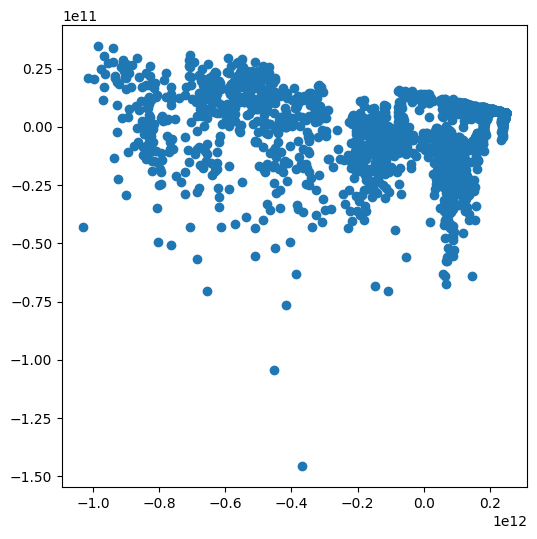

In [27]:
plt.figure(figsize = (6,6))
plt.scatter(data = df , x = 'PC1',y = 'PC2'  )
plt.show()

In [28]:
# Doge - Dataset preprocessing

In [29]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #Normalization

In [30]:
Doge = pd.read_csv('dogecoin.csv')

In [31]:
Doge.head()

,date,price,total_volume,market_cap,coin_name
0,2015-01-01 00:00:00.000,0.000183,283845.500641,1.780332e+07,dogecoin
1,2015-01-02 00:00:00.000,0.000184,363741.739089,1.784733e+07,dogecoin
2,2015-01-03 00:00:00.000,0.000168,270052.236025,1.632320e+07,dogecoin
3,2015-01-04 00:00:00.000,0.000158,353697.860482,1.538501e+07,dogecoin
4,2015-01-05 00:00:00.000,0.000160,554935.735782,1.560247e+07,dogecoin


In [32]:
Doge.drop(['coin_name'], axis=1, inplace=True)
Doge.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2999 entries, 0 to 2998
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2999 non-null   object 
 1   price         2999 non-null   float64
 2   total_volume  2999 non-null   float64
 3   market_cap    2998 non-null   float64
dtypes: float64(3), object(1)
memory usage: 93.8+ KB


In [33]:
#As market_cap has 1 NaN value
# Filling it By Interpolation
Doge.market_cap.interpolate(method='linear', inplace=True)

In [34]:
# Adding DateReference Column for Training with Linear Regression
# And Frommtting Date
Doge['date'] = pd.to_datetime(Doge['date'])

# Computing the number of days since the earliest date in the column
ref_date = Doge['date'].min()
Doge['DaysSinceRef'] = (Doge['date'] - ref_date).dt.days

In [35]:
Doge.price = Doge.price.round().astype('Int64')
Doge.total_volume = Doge.total_volume.round().astype('Int64')
Doge.market_cap = Doge.market_cap.round().astype('Int64')

In [36]:
Doge.head(5)

,date,price,total_volume,market_cap,DaysSinceRef
0,2015-01-01,0,283846,17803324,0
1,2015-01-02,0,363742,17847328,1
2,2015-01-03,0,270052,16323200,2
3,2015-01-04,0,353698,15385008,3
4,2015-01-05,0,554936,15602472,4


In [37]:
#Snapshot for PCA
cols=['price','total_volume','market_cap']
X =  np.array(Doge[cols].values).astype(np.float64)

In [38]:
# Since Data Viries alot in sclae -> Normalizing
cols=['price','total_volume','market_cap']
scaler = MinMaxScaler()
Doge[cols] = scaler.fit_transform(Doge[cols])

In [39]:
#Check Normalized Form
Doge.head(5)

,date,price,total_volume,market_cap,DaysSinceRef
0,2015-01-01,0.0,0.000005,0.000103,0
1,2015-01-02,0.0,0.000007,0.000104,1
2,2015-01-03,0.0,0.000005,0.000087,2
3,2015-01-04,0.0,0.000007,0.000076,3
4,2015-01-05,0.0,0.000011,0.000079,4


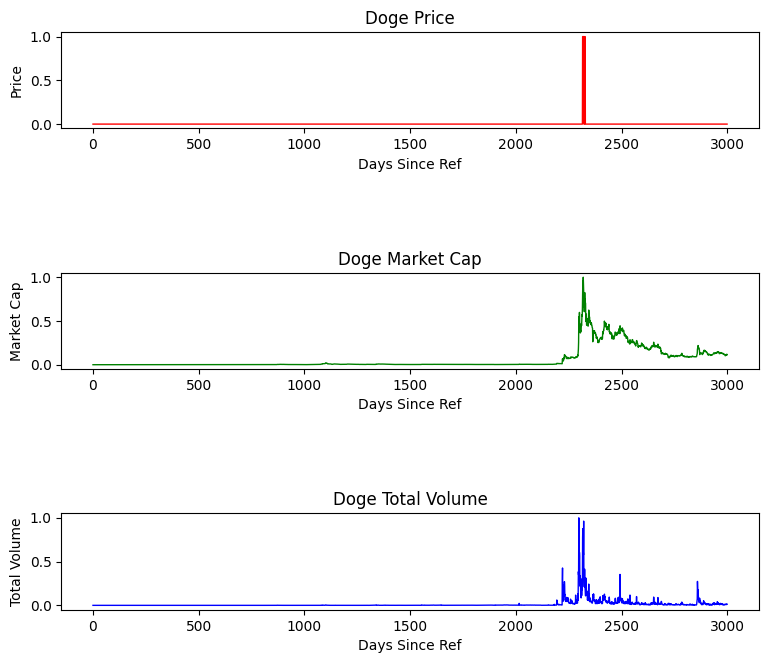

In [40]:
#Univariate Analysis:
fig = plt.figure(figsize=(9,7.5))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
ax1.plot(Doge.price.values, 'r', linewidth=1)# x='DaysSinceRef',y='market_cap')
ax2.plot(Doge.market_cap.values, 'g', linewidth=1)#x=DaysSinceRef',y='price')
ax3.plot(Doge.total_volume.values, 'b', linewidth=1)# plot(x='DaysSinceRef',y='total_volume')

# add axis labels and a title to each subplot
ax1.set_xlabel('Days Since Ref')
ax1.set_ylabel('Price')
ax1.set_title('Doge Price')

ax2.set_xlabel('Days Since Ref')
ax2.set_ylabel('Market Cap')
ax2.set_title('Doge Market Cap')

ax3.set_xlabel('Days Since Ref')
ax3.set_ylabel('Total Volume')
ax3.set_title('Doge Total Volume')

fig.subplots_adjust(hspace=1.5)
# display the plot
plt.show()


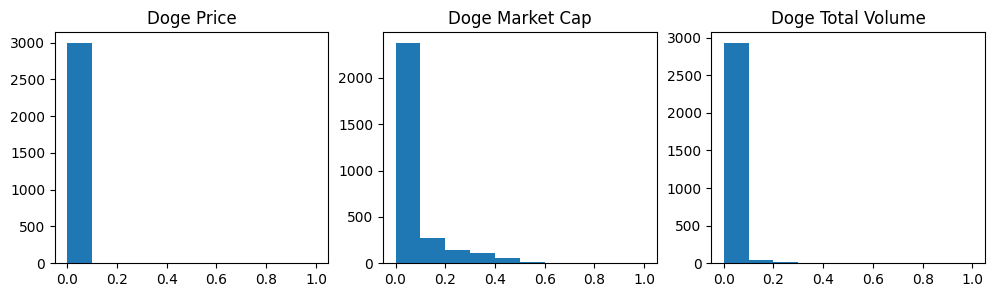

In [41]:
fig = plt.figure(figsize=(12,3))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.hist(Doge.price.values)
ax2.hist(Doge.market_cap.values)
ax3.hist(Doge.total_volume.values)

ax1.set_title('Doge Price')

ax2.set_title('Doge Market Cap')

ax3.set_title('Doge Total Volume')

fig.subplots_adjust(hspace=1.5)
# display the plot
plt.show()


<Axes: xlabel='price', ylabel='total_volume'>

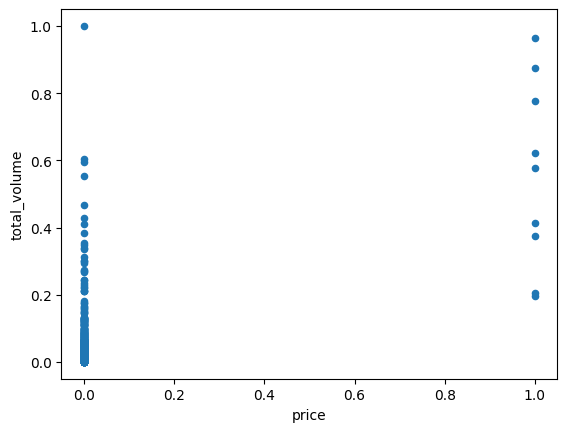

In [42]:
#Bivariate Analysis:
Doge.plot.scatter(x='price', y = 'total_volume')

<Axes: xlabel='price', ylabel='market_cap'>

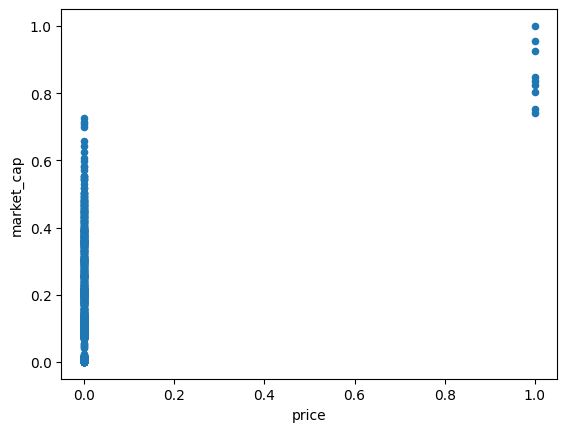

In [43]:
Doge.plot.scatter(x='price', y = 'market_cap')

In [44]:
#Multi-Variate Analysis
Doge.cov()

C:\Users\mubee\AppData\Local\Temp\ipykernel_17084\113679260.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  Doge.cov()


,price,total_volume,market_cap,DaysSinceRef
price,0.002993,0.001629,0.002384,2.465671
total_volume,0.001629,0.002853,0.004124,11.716343
market_cap,0.002384,0.004124,0.015128,59.694205
DaysSinceRef,2.465671,11.716343,59.694205,749776.774769


array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='total_volume', ylabel='price'>,
        <Axes: xlabel='market_cap', ylabel='price'>,
        <Axes: xlabel='DaysSinceRef', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='total_volume'>,
        <Axes: xlabel='total_volume', ylabel='total_volume'>,
        <Axes: xlabel='market_cap', ylabel='total_volume'>,
        <Axes: xlabel='DaysSinceRef', ylabel='total_volume'>],
       [<Axes: xlabel='price', ylabel='market_cap'>,
        <Axes: xlabel='total_volume', ylabel='market_cap'>,
        <Axes: xlabel='market_cap', ylabel='market_cap'>,
        <Axes: xlabel='DaysSinceRef', ylabel='market_cap'>],
       [<Axes: xlabel='price', ylabel='DaysSinceRef'>,
        <Axes: xlabel='total_volume', ylabel='DaysSinceRef'>,
        <Axes: xlabel='market_cap', ylabel='DaysSinceRef'>,
        <Axes: xlabel='DaysSinceRef', ylabel='DaysSinceRef'>]],
      dtype=object)

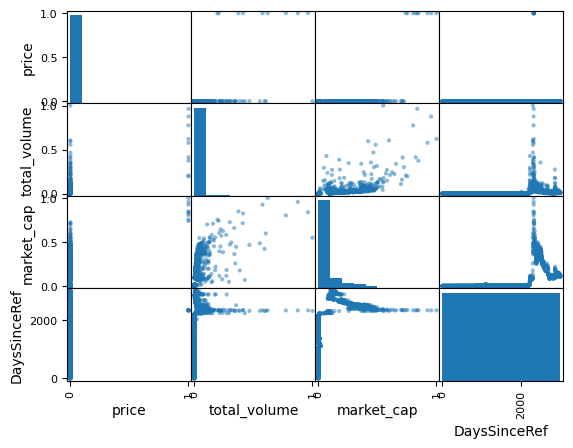

In [45]:
pd.plotting.scatter_matrix(Doge)

In [46]:
#PCA
X

array([[0.00000000e+00, 2.83846000e+05, 1.78033240e+07],
       [0.00000000e+00, 3.63742000e+05, 1.78473280e+07],
       [0.00000000e+00, 2.70052000e+05, 1.63232000e+07],
       ...,
       [0.00000000e+00, 4.27937130e+08, 1.01812894e+10],
       [0.00000000e+00, 6.48610111e+08, 1.06263048e+10],
       [0.00000000e+00, 6.71540817e+08, 1.01736552e+10]])

In [47]:
# Computing the covariance matrix
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(np.array(X_centered).T)
cov_matrix


array([[2.99299233e-03, 8.29968911e+07, 2.11662239e+08],
       [8.29968911e+07, 7.41004048e+18, 1.86602789e+19],
       [2.11662239e+08, 1.86602789e+19, 1.19251828e+20]])

In [48]:
#Computing the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues,'\n',eigenvectors)

[0.00000000e+00 1.22283054e+20 4.37881496e+18] 
 [[ 1.00000000e+00 -1.81735310e-12 -1.09584284e-11]
 [-1.11080410e-11 -1.60340936e-01 -9.87061692e-01]
 [-3.67549615e-14 -9.87061692e-01  1.60340936e-01]]


In [49]:
#Sorting the eigenvectors by decreasing eigenvalues
eigenvectors_sorted = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
print(eigenvectors_sorted)

[[-1.81735310e-12 -1.09584284e-11  1.00000000e+00]
 [-1.60340936e-01 -9.87061692e-01 -1.11080410e-11]
 [-9.87061692e-01  1.60340936e-01 -3.67549615e-14]]


In [50]:
# Top 2 vectors as enough as 3rd one has negligible participation
top_2_eigenvectors = eigenvectors_sorted[:, :2]

In [51]:
#Transforming Data
X_pca = (np.dot(top_2_eigenvectors.T, X_centered.T)).transpose()

In [52]:
df = pd.DataFrame(X_pca,columns=["PC1","PC2"])
df

,PC1,PC2
0,5.331647e+09,-1.958743e+08
1,5.331591e+09,-1.959461e+08
2,5.333110e+09,-1.960980e+08
3,5.334023e+09,-1.963310e+08
4,5.333776e+09,-1.964948e+08
...,...,...
2994,-5.031525e+09,6.982927e+08
2995,-4.332242e+09,7.039317e+08
2996,-4.768911e+09,1.011628e+09
2997,-5.243552e+09,8.651648e+08


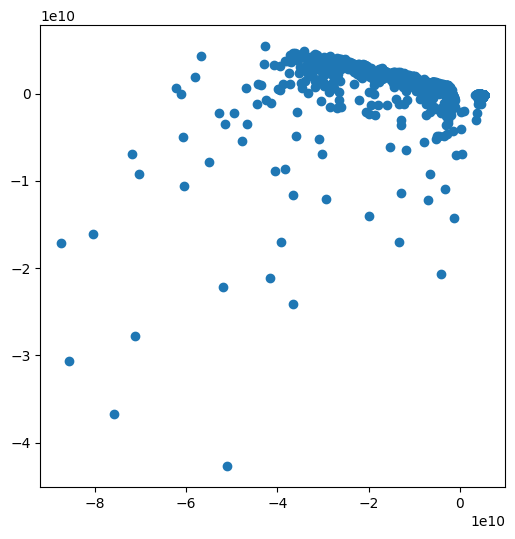

In [53]:
plt.figure(figsize = (6,6))
plt.scatter(data = df , x = 'PC1',y = 'PC2'  )
plt.show()

In [54]:
# ETH - Dataset preprocessing

In [55]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler #Normalization

In [56]:
ETH = pd.read_csv('ethereum.csv')

In [57]:
ETH.head()

,date,price,total_volume,market_cap,coin_name
0,2015-08-07 00:00:00.000,2.831620,9.062200e+04,0.000000e+00,ethereum
1,2015-08-08 00:00:00.000,1.330750,3.680700e+05,8.033948e+07,ethereum
2,2015-08-10 00:00:00.000,0.687586,4.004641e+05,4.155631e+07,ethereum
3,2015-08-11 00:00:00.000,1.067379,1.518998e+06,6.453901e+07,ethereum
4,2015-08-12 00:00:00.000,1.256613,2.073893e+06,7.601326e+07,ethereum


In [58]:
ETH.drop(['coin_name'], axis=1, inplace=True)
ETH.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2781 entries, 0 to 2780
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          2781 non-null   object 
 1   price         2781 non-null   float64
 2   total_volume  2781 non-null   float64
 3   market_cap    2780 non-null   float64
dtypes: float64(3), object(1)
memory usage: 87.0+ KB


In [59]:
#As market_cap has 1 NaN value
# Filling it By Interpolation
ETH.market_cap.interpolate(method='linear', inplace=True)

In [60]:
# Adding DateReference Column for Training with Linear Regression
# And Frommtting Date
ETH['date'] = pd.to_datetime(ETH['date'])

# Computing the number of days since the earliest date in the column
ref_date = ETH['date'].min()
ETH['DaysSinceRef'] = (ETH['date'] - ref_date).dt.days

In [61]:
ETH.price = ETH.price.round().astype('Int64')
ETH.total_volume = ETH.total_volume.round().astype('Int64')
ETH.market_cap = ETH.market_cap.round().astype('Int64')

In [62]:
ETH.head(5)

,date,price,total_volume,market_cap,DaysSinceRef
0,2015-08-07,3,90622,0,0
1,2015-08-08,1,368070,80339475,1
2,2015-08-10,1,400464,41556309,3
3,2015-08-11,1,1518998,64539006,4
4,2015-08-12,1,2073893,76013261,5


In [63]:
#Snapshot for PCA
cols=['price','total_volume','market_cap']
X =  np.array(ETH[cols].values).astype(np.float64)

In [64]:
# Since Data Viries alot in sclae -> Normalizing
cols=['price','total_volume','market_cap']
scaler = MinMaxScaler()
ETH[cols] = scaler.fit_transform(ETH[cols])

In [65]:
#Check Normalized Form
ETH.head(5)

,date,price,total_volume,market_cap,DaysSinceRef
0,2015-08-07,0.000623,2.517273e-08,0.000000,0
1,2015-08-08,0.000208,1.994195e-06,0.000141,1
2,2015-08-10,0.000208,2.224093e-06,0.000073,3
3,2015-08-11,0.000208,1.016222e-05,0.000113,4
4,2015-08-12,0.000208,1.410026e-05,0.000133,5


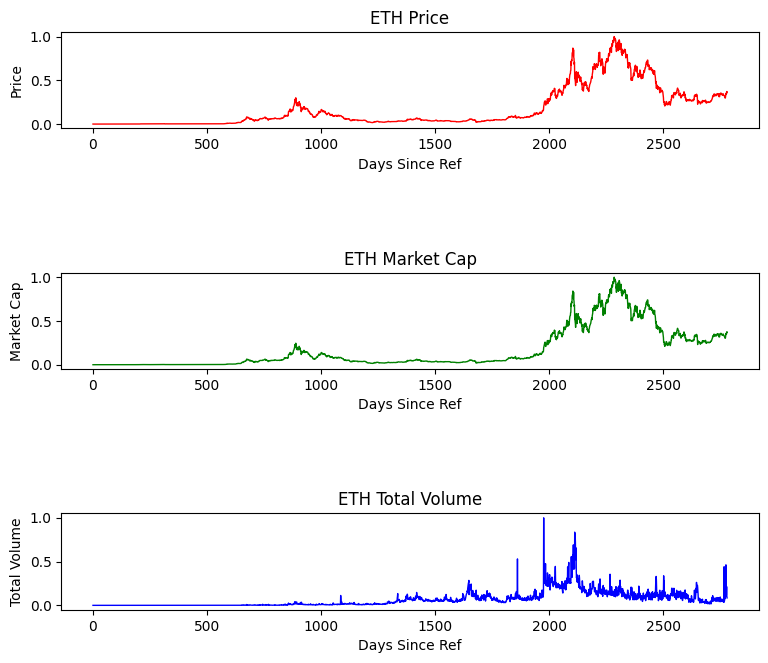

In [66]:
#Univariate Analysis:
fig = plt.figure(figsize=(9,7.5))
ax1 = plt.subplot(311)
ax2 = plt.subplot(312)
ax3 = plt.subplot(313)
ax1.plot(ETH.price.values, 'r', linewidth=1)# x='DaysSinceRef',y='market_cap')
ax2.plot(ETH.market_cap.values, 'g', linewidth=1)#x=DaysSinceRef',y='price')
ax3.plot(ETH.total_volume.values, 'b', linewidth=1)# plot(x='DaysSinceRef',y='total_volume')

# add axis labels and a title to each subplot
ax1.set_xlabel('Days Since Ref')
ax1.set_ylabel('Price')
ax1.set_title('ETH Price')

ax2.set_xlabel('Days Since Ref')
ax2.set_ylabel('Market Cap')
ax2.set_title('ETH Market Cap')

ax3.set_xlabel('Days Since Ref')
ax3.set_ylabel('Total Volume')
ax3.set_title('ETH Total Volume')

fig.subplots_adjust(hspace=1.5)
# display the plot
plt.show()


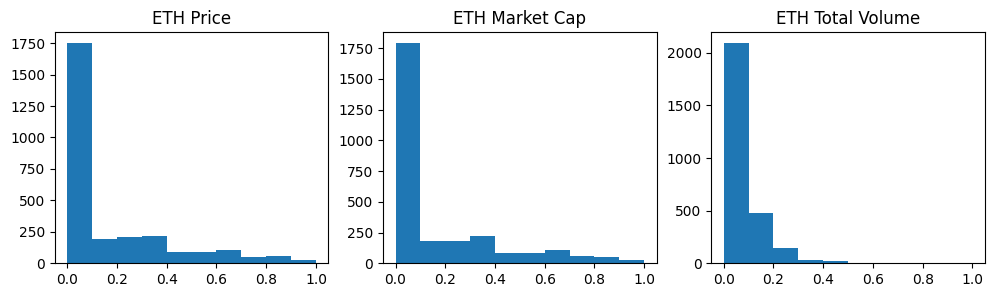

In [67]:
fig = plt.figure(figsize=(12,3))
ax1 = plt.subplot(131)
ax2 = plt.subplot(132)
ax3 = plt.subplot(133)
ax1.hist(ETH.price.values)
ax2.hist(ETH.market_cap.values)
ax3.hist(ETH.total_volume.values)

ax1.set_title('ETH Price')

ax2.set_title('ETH Market Cap')

ax3.set_title('ETH Total Volume')

fig.subplots_adjust(hspace=1.5)
# display the plot
plt.show()


<Axes: xlabel='price', ylabel='total_volume'>

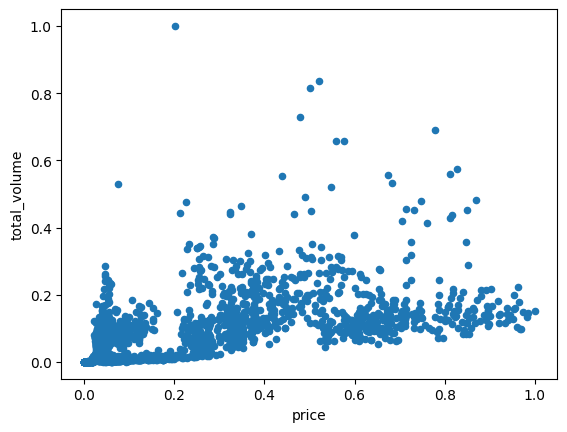

In [68]:
#Bivariate Analysis:
ETH.plot.scatter(x='price', y = 'total_volume')

<Axes: xlabel='price', ylabel='market_cap'>

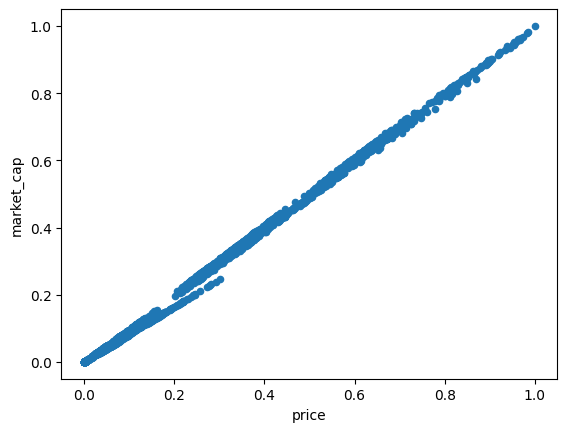

In [69]:
ETH.plot.scatter(x='price', y = 'market_cap')

In [70]:
#Multi-Variate Analysis
ETH.cov()

C:\Users\mubee\AppData\Local\Temp\ipykernel_17084\4139442963.py:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  ETH.cov()


,price,total_volume,market_cap,DaysSinceRef
price,0.052167,0.012556,0.052278,127.022545
total_volume,0.012556,0.008073,0.012558,44.371036
market_cap,0.052278,0.012558,0.052460,128.664606
DaysSinceRef,127.022545,44.371036,128.664606,644730.499999


array([[<Axes: xlabel='price', ylabel='price'>,
        <Axes: xlabel='total_volume', ylabel='price'>,
        <Axes: xlabel='market_cap', ylabel='price'>,
        <Axes: xlabel='DaysSinceRef', ylabel='price'>],
       [<Axes: xlabel='price', ylabel='total_volume'>,
        <Axes: xlabel='total_volume', ylabel='total_volume'>,
        <Axes: xlabel='market_cap', ylabel='total_volume'>,
        <Axes: xlabel='DaysSinceRef', ylabel='total_volume'>],
       [<Axes: xlabel='price', ylabel='market_cap'>,
        <Axes: xlabel='total_volume', ylabel='market_cap'>,
        <Axes: xlabel='market_cap', ylabel='market_cap'>,
        <Axes: xlabel='DaysSinceRef', ylabel='market_cap'>],
       [<Axes: xlabel='price', ylabel='DaysSinceRef'>,
        <Axes: xlabel='total_volume', ylabel='DaysSinceRef'>,
        <Axes: xlabel='market_cap', ylabel='DaysSinceRef'>,
        <Axes: xlabel='DaysSinceRef', ylabel='DaysSinceRef'>]],
      dtype=object)

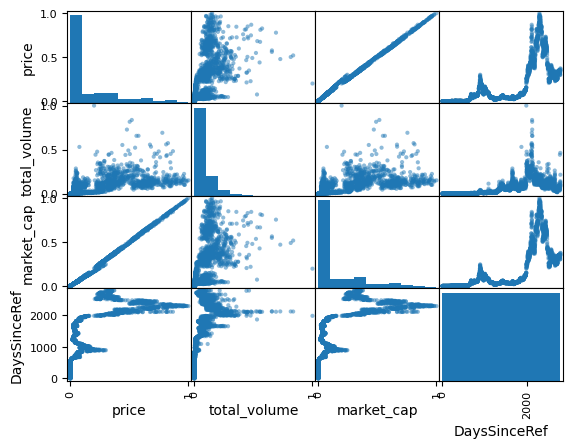

In [71]:
pd.plotting.scatter_matrix(ETH)

In [72]:
#PCA
X

array([[3.00000000e+00, 9.06220000e+04, 0.00000000e+00],
       [1.00000000e+00, 3.68070000e+05, 8.03394750e+07],
       [1.00000000e+00, 4.00464000e+05, 4.15563090e+07],
       ...,
       [1.68000000e+03, 3.02019304e+10, 2.02411235e+11],
       [1.79300000e+03, 1.44597276e+10, 2.15660561e+11],
       [1.76900000e+03, 1.19761821e+10, 2.13123927e+11]])

In [73]:
# Computing the covariance matrix
X_centered = X - np.mean(X, axis=0)
cov_matrix = np.cov(np.array(X_centered).T)
cov_matrix


array([[1.20946306e+06, 8.51857912e+12, 1.43899254e+14],
       [8.51857912e+12, 1.60288124e+20, 1.01158983e+21],
       [1.43899254e+14, 1.01158983e+21, 1.71441755e+22]])

In [74]:
#Computing the eigenvalues and eigenvectors of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print(eigenvalues,'\n',eigenvectors)

[0.00000000e+00 1.72042153e+22 1.00248324e+20] 
 [[ 1.00000000e+00 -8.37882872e-09  2.20245227e-10]
 [-2.76567660e-10 -5.92476588e-02 -9.98243314e-01]
 [-8.37715877e-09 -9.98243314e-01  5.92476588e-02]]


In [75]:
#Sorting the eigenvectors by decreasing eigenvalues
eigenvectors_sorted = eigenvectors[:, np.argsort(eigenvalues)[::-1]]
print(eigenvectors_sorted)

[[-8.37882872e-09  2.20245227e-10  1.00000000e+00]
 [-5.92476588e-02 -9.98243314e-01 -2.76567660e-10]
 [-9.98243314e-01  5.92476588e-02 -8.37715877e-09]]


In [76]:
# Top 2 vectors as enough as 3rd one has negligible participation
top_2_eigenvectors = eigenvectors_sorted[:, :2]

In [77]:
#Transforming Data
X_pca = (np.dot(top_2_eigenvectors.T, X_centered.T)).transpose()

In [78]:
df = pd.DataFrame(X_pca,columns=["PC1","PC2"])
df

,PC1,PC2
0,9.595724e+10,3.714008e+09
1,9.587702e+10,3.718491e+09
2,9.591573e+10,3.716161e+09
3,9.589273e+10,3.716406e+09
4,9.588124e+10,3.716532e+09
...,...,...
2776,-1.105953e+11,-3.895278e+09
2777,-1.043221e+11,-1.686957e+09
2778,-1.078878e+11,-1.444238e+10
2779,-1.201812e+11,2.057155e+09


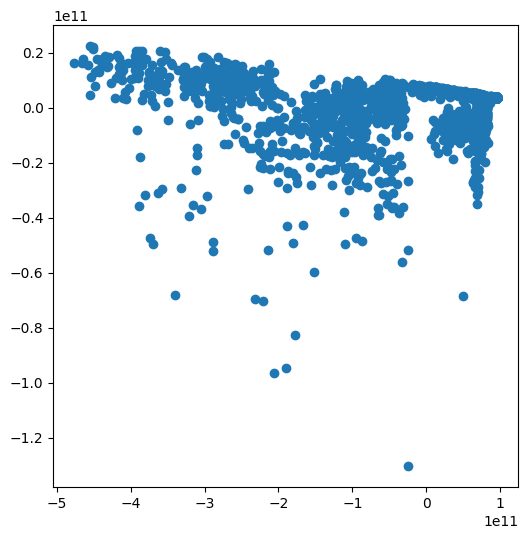

In [79]:
plt.figure(figsize = (6,6))
plt.scatter(data = df , x = 'PC1',y = 'PC2'  )
plt.show()

In [88]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_squared_log_error

# Read data from pandas DataFrame


# Extract the input features and target variable
X = BTC[['total_volume', 'DaysSinceRef']].values
y = BTC['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.02272846672621465
Root Mean Squared Error (RMSE): 0.15075963228336242


In [89]:
import joblib
# Save the trained model
joblib.dump(model, 'linear_regression_model_BTC.joblib')

['linear_regression_model_BTC.joblib']

In [90]:


# Extract the input features and target variable
X = ETH[['total_volume', 'DaysSinceRef']].values
y = ETH['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.023199502597192816
Root Mean Squared Error (RMSE): 0.15231382930381868


In [91]:
# Save the trained model
joblib.dump(model, 'linear_regression_model_ETH.joblib')

['linear_regression_model_ETH.joblib']

In [92]:


# Extract the input features and target variable
X = Doge[['total_volume', 'DaysSinceRef']].values
y = Doge['price'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate mean squared error (MSE)
mse = mean_squared_error(y_test, y_pred)

# Calculate root mean squared error (RMSE)
rmse = np.sqrt(mse)

print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)


Mean Squared Error (MSE): 0.0015679702933180004
Root Mean Squared Error (RMSE): 0.03959760464116485


In [94]:
# Save the trained model
joblib.dump(model, 'linear_regression_model_Doge.joblib')

['linear_regression_model_Doge.joblib']